# **CSCI 183 - HW 2 - Regression for Diabetes Dataset**

## Tara Khambadkone & Ansha Shekhar


# Steps 1-3: Loading dataset & linear correlation assessment

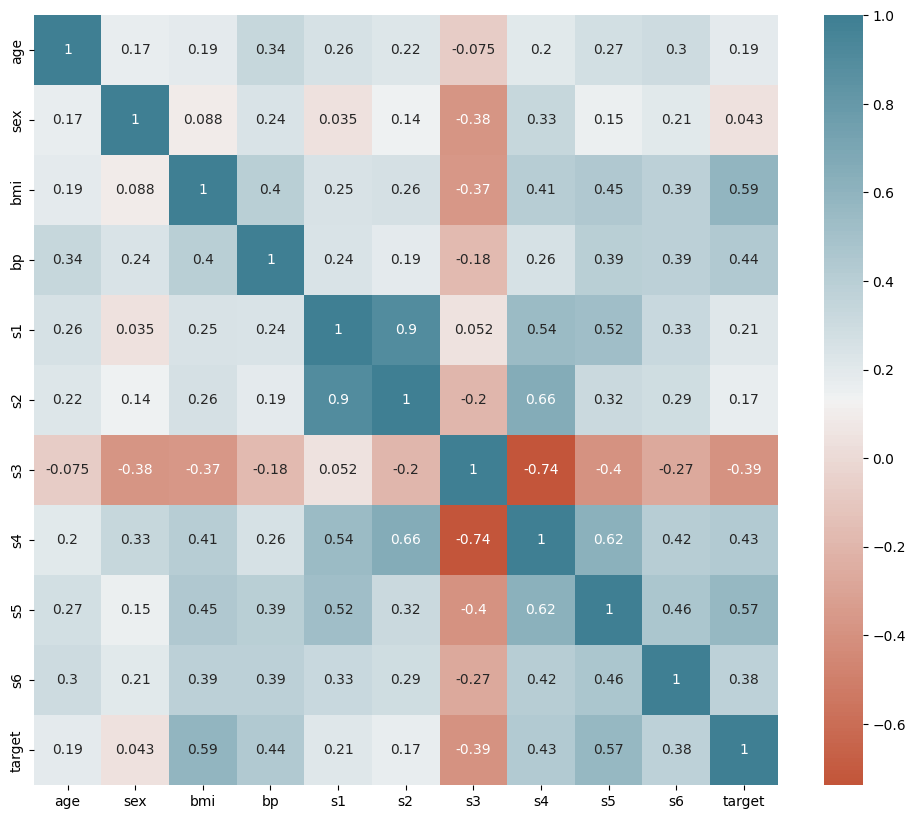

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns

#s1 tc, total serum cholesterol; s2 ldl, low-density lipoproteins; s3 hdl, high-density lipoproteins;
#s4 tch, total cholesterol / HDL; s5 ltg, possibly log of serum triglycerides level; s6 glu, blood sugar level
diabetes = load_diabetes()

#separate dataset into x and y
X = diabetes.data
y = diabetes.target

#convert dataset to dataframe
diabetes_df = pd.DataFrame(X, columns=diabetes.feature_names)
diabetes_df['target'] = y

#make heatmap to more easily vizualize correlation coefficients between features
plt.figure(figsize=(12,10))
#corr_heatmap = sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdYlGn')
corr_heatmap = sns.heatmap(diabetes_df.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()


#### Step 2

*   The two features with the strongest positive linear correlation to the target are BMI (body-mass index) and s5 (ltg; possibly log of serum triglycerides level) with correlation coefficients of 0.586450 and 0.565883, respectively.
*   The feature with the strongest/only negative linear correlation to the target is s3 (hdl; high-density lipoproteins) with a correlation coefficient of -0.394789.

#### Step 3

*   The two features that don't correlate with the target are sex and s2 (ldl, low-density lipoproteins) with correlation coefficients of 0.043062 and 0.174054, respectively.




  

  

# Steps 4 - 6

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64
Feature: age
Correlation: 0.1879
Mean Squared Error: 5720.5

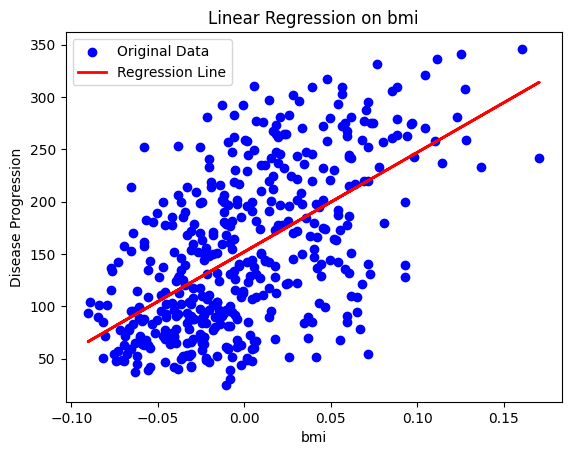

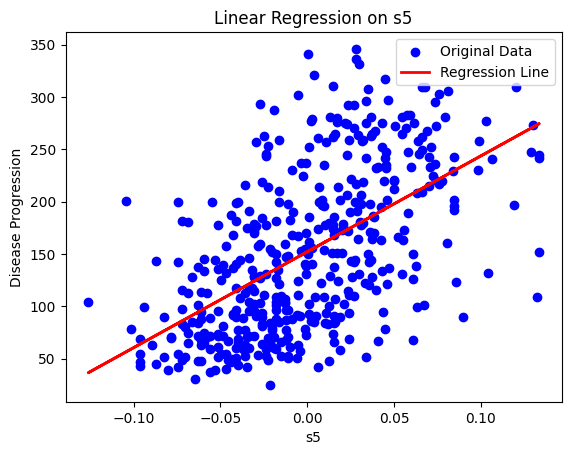

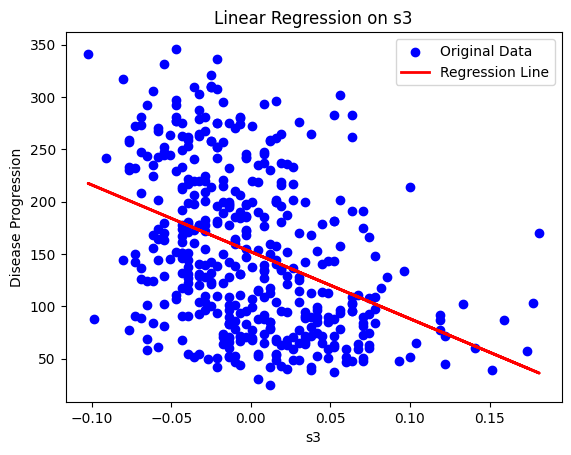

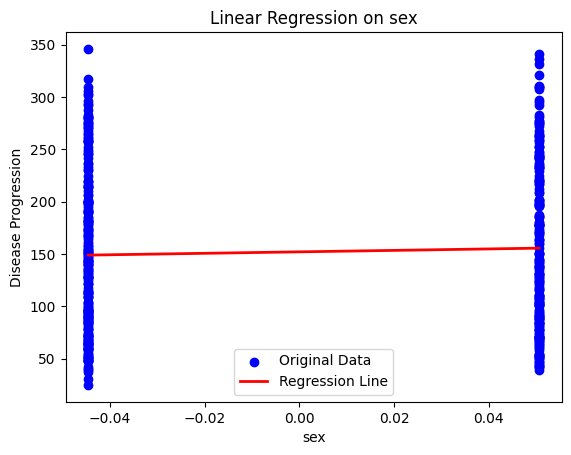

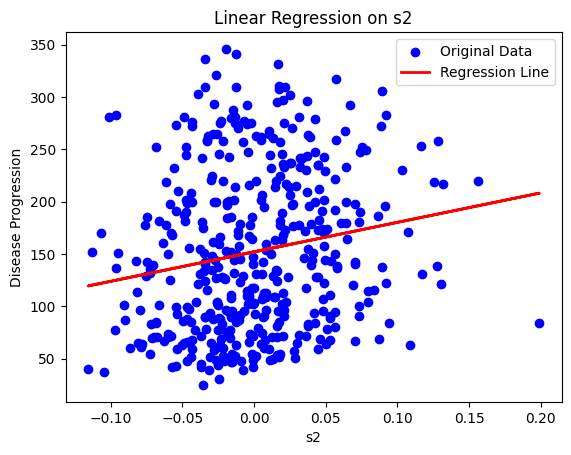


Multiple Linear Regression MSE: 2859.6963


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

diabetes = load_diabetes()

#separate dataset into x and y
X = diabetes.data
y = diabetes.target

#convert dataset to dataframe
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

print(df.head())

#correlation analysis
correlations = df.corr()['target'].sort_values(ascending=False)
print(correlations)

results = []
#perform simple linear regression
for feature in diabetes.feature_names:
    X_feature = df[[feature]]  #

    #linear regression model
    model = LinearRegression()
    # train the model
    model.fit(X_feature, y)

    #predict the target variable using the trained model
    y_pred = model.predict(X_feature)

    #calculate mean squared error
    mse = mean_squared_error(y, y_pred)

    results.append({
        'Feature': feature,
        'Correlation': correlations[feature],
        'MSE': mse,
        'Coefficient': model.coef_[0],
        'Intercept': model.intercept_
    })

    #evaluation metrics for the feature
    print(f"Feature: {feature}")
    print(f"Correlation: {correlations[feature]:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Coefficient: {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}\n")

# Scatter Plots for Simple Linear Regression Models
selected_features = ['bmi', 's5', 's3', 'sex', 's2']

for feature in selected_features:
  X_feature = df[[feature]]
  #fit a linear regression model for BMI
  y_pred = LinearRegression().fit(X_feature, y).predict(X_feature)

  plt.scatter(X_feature, y, color='blue', label='Original Data')
  plt.plot(X_feature, y_pred, color='red', linewidth=2, label='Regression Line')

  # labels and legend
  plt.xlabel(feature)
  plt.ylabel('Disease Progression')
  plt.title('Linear Regression on ' + feature)
  plt.legend()

  plt.show()

#multiple linear regression with all features - for 7.6
X_all = df[diabetes.feature_names]
model = LinearRegression()
model.fit(X_all, y)
y_pred_all = model.predict(X_all)

#calculate MSE for multiple linear regression
mse_all = mean_squared_error(y, y_pred_all)

print(f"\nMultiple Linear Regression MSE: {mse_all:.4f}")




# Step 7

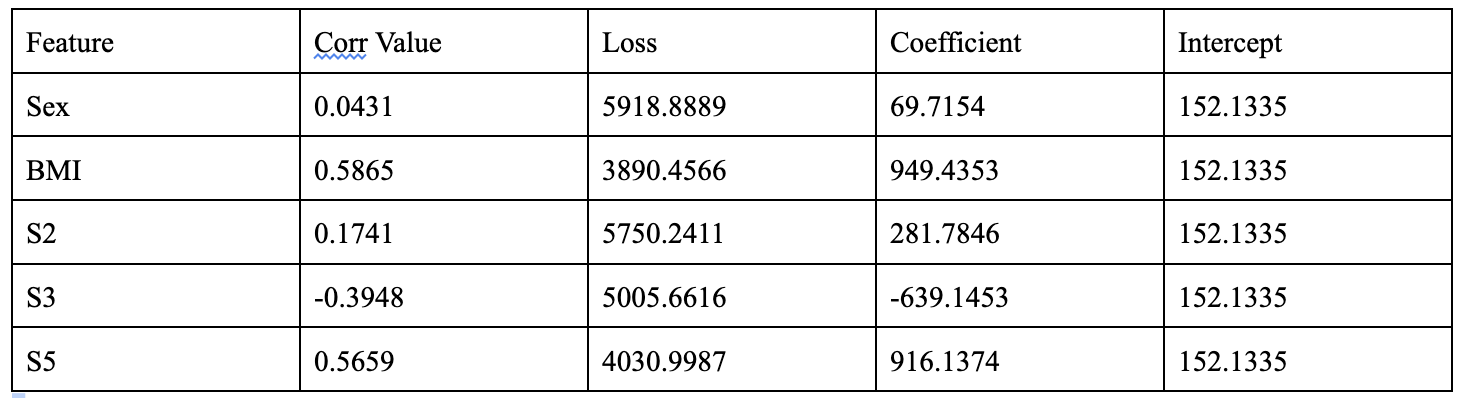

#### Questions for 7:



1.   BMI has the strongest linear relationship with the disease progression, with a correlation value of 0.5865.
2.   
*   Sex: 5918.8889
*   BMI: 3890.4566
*   S2: 5750.2411
*   S3: 5005.6616
*   S5: 4030.9987
3. For the feature BMI, which has the highest correlation, the regression line likely fits the data well, showing a clear positive relationship between BMI and disease progression. The MSE value for BMI is the lowest among the features, suggesting the model does a good job predicting the target using BMI. The weaker the correlation is between a feature and the target, the worse the linear regression model will perform. Hence why

4. Linear correlation determines the strength of the  relationship two variables/features have. Therefore, choosing the feature with the strongest correlation to the target when performing simple linear regression ensures a more accurate model since that positive linear relationship is well-established.
5. Features with lower correlation values with the target have increased loss/MSE scores compared to features with higher correlation values. For example, sex has a correlation of 0.0431 and thus has a high MRE score, showing poor performance in the linear regression model because of its low correlation value.
6. The multiple linear regression MSE is 2859.6963, which is a significant improvement over the one simple linear regression models. They had MSEs ranging from 3890 to 5918. This demonstrates that using all features together allows the model to capture more information and provide better predictions. Overall, multiple linear regression provides a more accurate fit for predicting disease progression than relying on any single feature.

